# Model making notebook

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Load sample image

In [45]:
img=cv2.imread('D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\maria_sharapova\\166-1666011_maria-sharapova-wallpaper-hd-tennis-maria-sharapova-4k.jpg')
img.shape

(1200, 1600, 3)

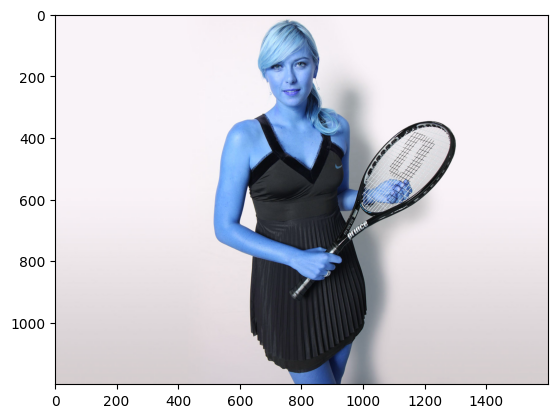

In [46]:
plt.imshow(img)

# Convert image to black and white

In [47]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1200, 1600)

In [48]:
gray

array([[245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       ...,
       [207, 207, 207, ..., 212, 204, 205],
       [207, 207, 207, ..., 209, 206, 203],
       [207, 207, 207, ..., 203, 210, 206]], dtype=uint8)

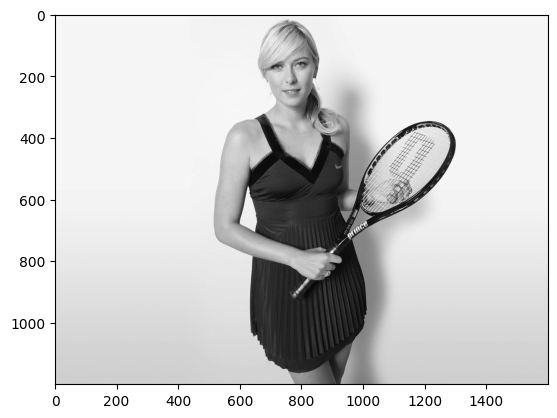

In [49]:
plt.imshow(gray, cmap='gray')

# Use opencvhaar cascade files to detect face and eyes

In [50]:
face_cascade=cv2.CascadeClassifier('D:\\Programming\\Python\\SportsPersonClassifier\\model\\opencv\\haarcascades\\haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('D:\\Programming\\Python\\SportsPersonClassifier\\model\\opencv\\haarcascades\\haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[658,  87, 202, 202]])

In [51]:
(x,y,w,h)=faces[0]
x,y,w,h

(658, 87, 202, 202)

# Plot rectangle for face

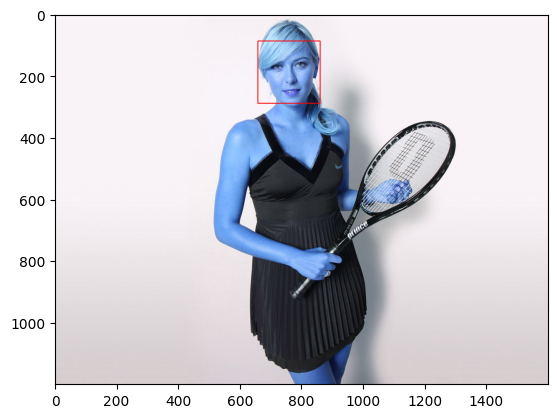

In [52]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

# Plot rectangle for face and eyes

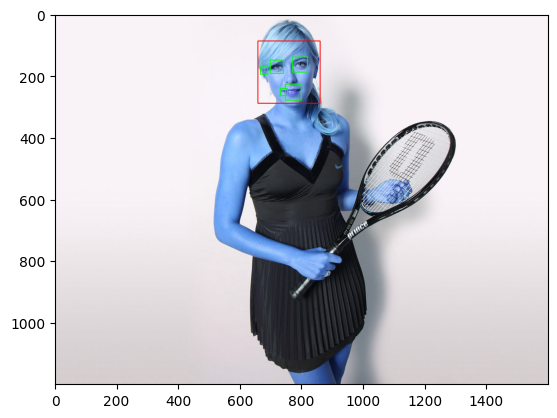

In [53]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+h]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

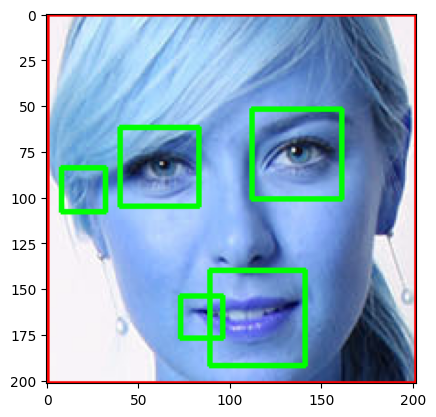

In [54]:
plt.imshow(roi_color,cmap='gray')

# Function to cropped face out of image

In [55]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,e,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

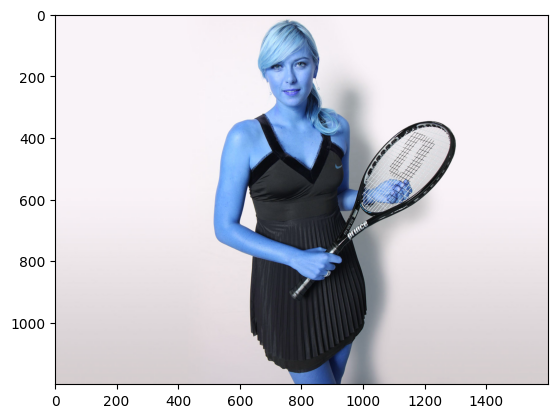

In [56]:
original_image=cv2.imread('D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\maria_sharapova\\166-1666011_maria-sharapova-wallpaper-hd-tennis-maria-sharapova-4k.jpg')
plt.imshow(original_image)

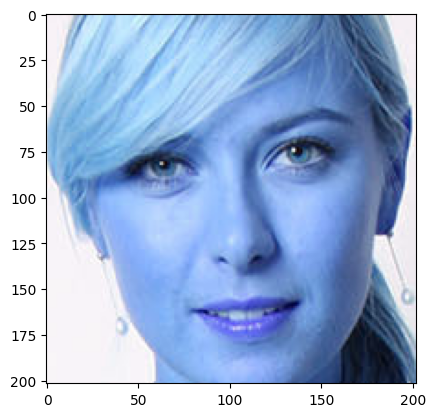

In [57]:
cropped_image=get_cropped_image_if_2_eyes('D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\maria_sharapova\\166-1666011_maria-sharapova-wallpaper-hd-tennis-maria-sharapova-4k.jpg')
plt.imshow(cropped_image)

In [58]:
cropped_image_no_2_eyes=get_cropped_image_if_2_eyes('D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\maria_sharapova\\3-681.jpg')
cropped_image_no_2_eyes


# Save file paths in variables

In [59]:
path_to_data='D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\'
path_to_cr_data='D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\'

# Create list of paths containing model training data

In [60]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [61]:
img_dirs

['D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped',
 'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\lionel_messi',
 'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\maria_sharapova',
 'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\roger_federer',
 'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\serena_williams',
 'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\virat_kohli']

# Function to make folder for cropped images if it does not exist

In [62]:
import shutil 
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

# Function to generate cropped face images from training images

In [63]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder: ',cropped_folder)
                
            cropped_file_name=celebrity_name + str(count) + '.png'
            cropped_file_path=cropped_folder+'\\'+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

cropped
lionel_messi
Generating cropped images in folder:  D:\Programming\Python\SportsPersonClassifier\model\dataset\cropped\lionel_messi
maria_sharapova
Generating cropped images in folder:  D:\Programming\Python\SportsPersonClassifier\model\dataset\cropped\maria_sharapova
roger_federer
Generating cropped images in folder:  D:\Programming\Python\SportsPersonClassifier\model\dataset\cropped\roger_federer
serena_williams
Generating cropped images in folder:  D:\Programming\Python\SportsPersonClassifier\model\dataset\cropped\serena_williams
virat_kohli
Generating cropped images in folder:  D:\Programming\Python\SportsPersonClassifier\model\dataset\cropped\virat_kohli


# Function to wavelet transform the image

In [64]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

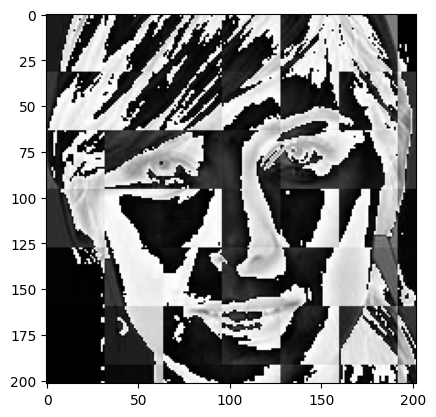

In [65]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [66]:
cropped_image_dirs

['D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\lionel_messi',
 'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\maria_sharapova',
 'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\roger_federer',
 'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\serena_williams',
 'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\virat_kohli']

# Create dictionary with celebrity names as keys and addresses of all training images of that celebrity as values 

In [85]:
# celebrity_file_names_dict.pop('cropped')
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi1.png',
  'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi10.png',
  'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi11.png',
  'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi13.png',
  'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi14.png',
  'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi15.png',
  'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi16.png',
  'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi17.png',
  'D:\\Programming\\Python\\SportsPersonClassifier\\model\\dataset\\cropped\\lionel_messi

# Assign each celebity a numeric value

In [68]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count+=1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

# Scaling and vertically stacking BnW image with wavelet transformed image

In [86]:

X=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

# Reshape each image data to be in a single array

In [87]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(163, 4096)

In [71]:
X[0]

array([ 90., 120., 132., ..., 232.,   1.,  88.])

In [72]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Splitting dataset in train and test datasets and testing on SVC


In [88]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.926829268292683

In [89]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      0.91      0.95        11
           2       0.88      1.00      0.93         7
           3       1.00      0.75      0.86         4
           4       0.86      1.00      0.92        12

    accuracy                           0.93        41
   macro avg       0.95      0.90      0.92        41
weighted avg       0.94      0.93      0.93        41



In [75]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [76]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

# Use gridsearchCV to find the best ML algorithm

In [90]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.827667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.606667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.843667,{'logisticregression__C': 1}


In [91]:
best_estimators['svm'].score(X_test, y_test)

0.926829268292683

In [92]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.975609756097561

# Chose Logistic Regression

In [94]:
best_clf=best_estimators['logistic_regression']

# Plot Confusion Matrix

Text(95.72222222222221, 0.5, 'Truth')

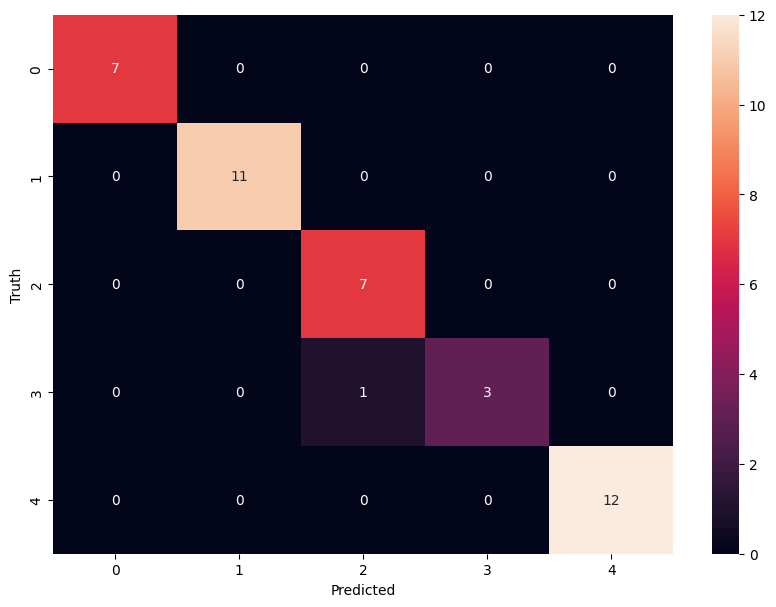

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

# Save the model and the celebrity labels as pickle and json file respectively

In [83]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [84]:
import json 
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))